Лабораторная работа 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
class TestFunction:
    def __init__(self, function, domain, real_min, name):
        self.function = function
        self.domain = domain
        self.real_min = real_min
        self.name = name

In [ ]:
sphere_function = TestFunction(
    function=lambda d: d[0]**2 + d[1]**2,
    domain=np.array([[-2, -2], [2, 2]]),
    real_min=np.array([0, 0, 0]),
    name='sphere',
)

levi_function = TestFunction(
    function=lambda d: np.sin(3 * np.pi * d[0])**2 + (d[0] - 1)**2 * (1 + np.sin(3 * np.pi * d[1])**2) + (d[1] - 1)**2 * (1 + np.sin(2 * np.pi * d[1])**2),
    domain=np.array([[-10, -10], [10, 10]]),
    real_min=np.array([1, 1, 0]),
    name='levi',
)

In [ ]:
def visualize_gradient_descent(test_function, path, title):
    function = test_function.function
    domain = test_function.domain
    real_min = test_function.real_min
    name = test_function.name

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    x = np.linspace(domain[0, 0], domain[1, 0], 100)
    y = np.linspace(domain[0, 1], domain[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = function(np.array([x_grid, y_grid]))

    ax.plot_surface(x_grid, y_grid, z_grid, cmap='plasma', alpha=0.5)
    ax.plot(path[:, 0], path[:, 1], path[:, 2], '-o', c='black', label = 'Gradient descent', alpha=0.7)
    ax.scatter3D(path[0, 0], path[0, 1], path[0, 2], s=100, c="white", lw=2, ec='black', marker='D', label="Start point")
    ax.scatter3D(path[-1, 0], path[-1, 1], path[-1, 2], s=190, c="white", lw=2, ec='black', marker='X', label="Found min")
    ax.scatter3D(real_min[0], real_min[1], real_min[2], s=150, c="red", lw=2, ec='black', marker='o', label="Global min", alpha=0.7)

    print(f"Start point:\t{path[0]}")
    print(f"Found min:\t{path[-1]}")
    print(f"Global min:\t{real_min}")
    print(f"Iterations cnt:\t{len(path)}")

    ax.set_title(f"{name}: {title}")
    ax.legend()
    plt.show()

In [ ]:
def grad(function, point, dt=1e-5):
    dxdt = (function(point + np.array([dt, 0])) - function(point)) / dt
    dydt = (function(point + np.array([0, dt])) - function(point)) / dt
    return np.array([dxdt, dydt])

In [ ]:
def GD(function, lr, start_point, real_min, conv_radius=1e-3, max_steps=1e3):
    path = [np.array([start_point[0], start_point[1], function(start_point)])]
    point = start_point
    step = 0

    while np.linalg.norm(path[-1] - real_min) > conv_radius and step < max_steps:
        point = point - lr * grad(function, point)
        path.append(np.array([point[0], point[1], function(point)]))
        step += 1

    return np.array(path)

Start point:	[-1.5   1.3   3.94]
Found min:	[-7.58519111e-04  6.48054585e-04  9.95325988e-07]
Global min:	[0 0 0]
Iterations cnt:	377


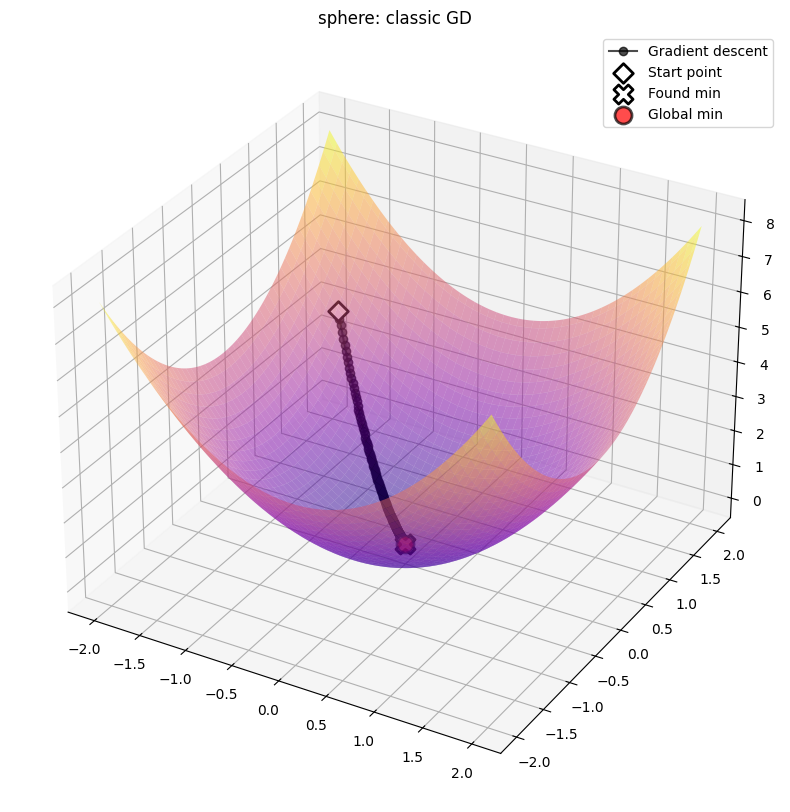

In [ ]:
classic_sphere_path = GD(
    function=sphere_function.function,
    lr=1e-2,
    start_point=np.array([-1.5, 1.3]),
    real_min=sphere_function.real_min,
)

visualize_gradient_descent(sphere_function, classic_sphere_path, 'classic GD')

Start point:	[ -9.2         8.5       265.2345085]
Found min:	[-1.62046412  0.61108225  8.97681392]
Global min:	[1 1 0]
Iterations cnt:	1001


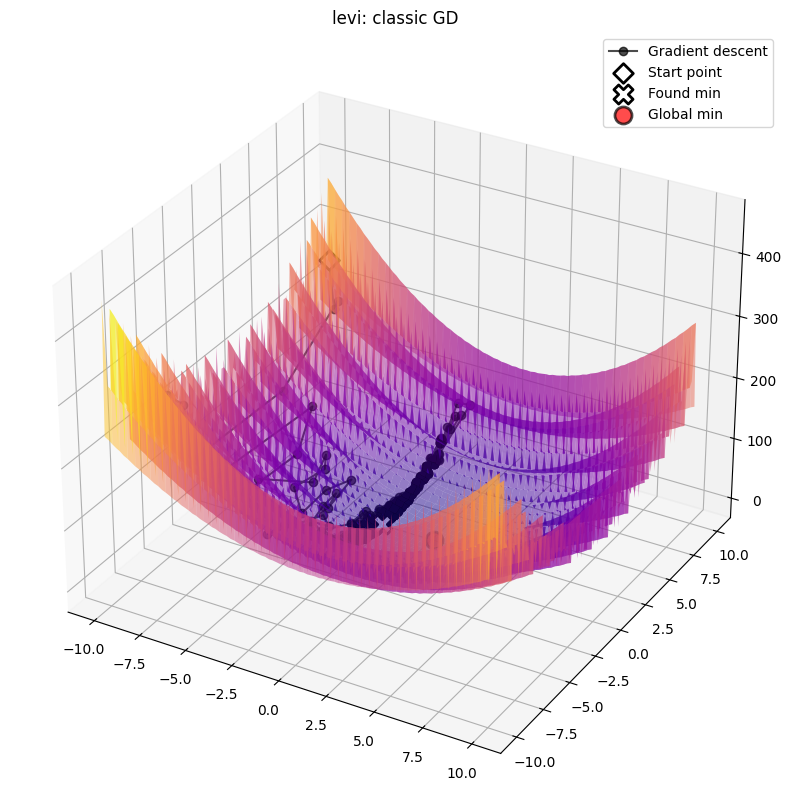

In [ ]:
classic_levi_path = GD(
    function=levi_function.function,
    lr=1e-2,
    start_point=np.array([-9.2, 8.5]),
    real_min=levi_function.real_min,
)

visualize_gradient_descent(levi_function, classic_levi_path, 'classic GD')

SGD Momentum

In [ ]:
def GD_Momentum(function, lr, start_point, real_min, conv_radius=1e-3, max_steps=1e3, beta=0.9):
    path = [np.array([start_point[0], start_point[1], function(start_point)])]
    point = start_point
    point_prev = start_point
    step = 0

    while np.linalg.norm(path[-1] - real_min) > conv_radius and step < max_steps:
        point_new = point - lr * grad(function, point) + beta * (point - point_prev)
        point_prev = point
        point = point_new
        path.append(np.array([point[0], point[1], function(point)]))
        step += 1

    return np.array(path)

Start point:	[-1.5   1.3   3.94]
Found min:	[-5.19110110e-04  4.40565294e-04  4.63573085e-07]
Global min:	[0 0 0]
Iterations cnt:	107


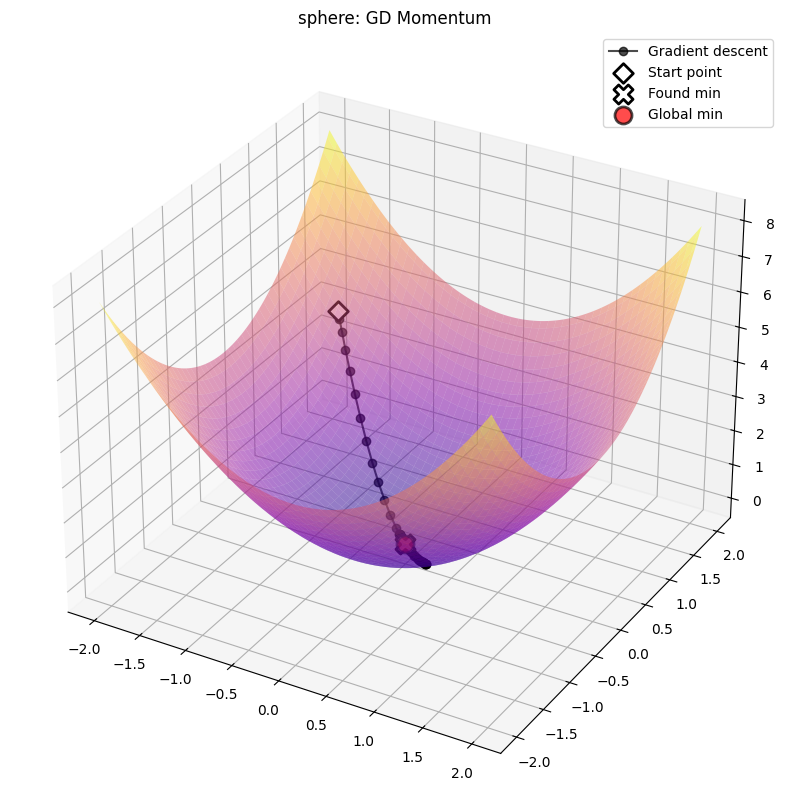

In [ ]:
momentum_sphere_path = GD_Momentum(
    function=sphere_function.function,
    lr=1e-2,
    start_point=np.array([-1.5, 1.3]),
    real_min=sphere_function.real_min,
)

visualize_gradient_descent(sphere_function, momentum_sphere_path, 'GD Momentum')

Start point:	[ -9.2         8.5       265.2345085]
Found min:	[0.67037553 0.999995   0.10987366]
Global min:	[1 1 0]
Iterations cnt:	10001


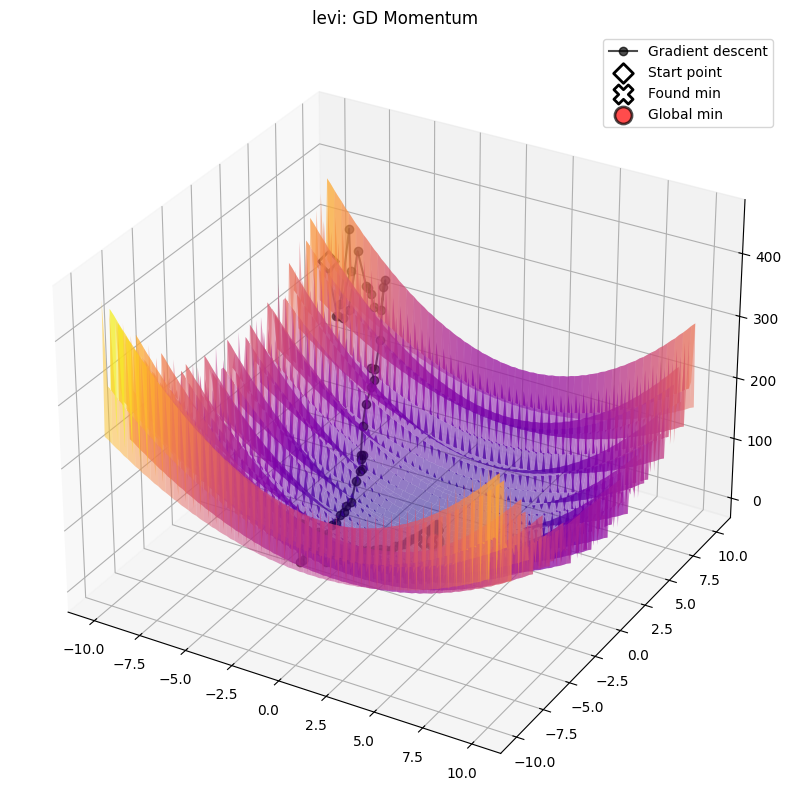

In [ ]:
momentum_levi_path = GD_Momentum(
    function=levi_function.function,
    lr=1e-3,
    start_point=np.array([-9.2, 8.5]),
    real_min=levi_function.real_min,
    max_steps=1e4,
)

visualize_gradient_descent(levi_function, momentum_levi_path, 'GD Momentum')

Adam

In [ ]:
def Adam(function, lr, start_point, real_min, conv_radius=1e-3, max_steps=1e3, betas=(0.6, 0.999)):
    path = [np.array([start_point[0], start_point[1], function(start_point)])]
    point = start_point
    step = 0
    m = np.array([0, 0])
    v = np.array([0, 0])

    while np.linalg.norm(path[-1] - real_min) > conv_radius and step < max_steps:
        m = betas[0] * m + (1 - betas[0]) * grad(function, point)
        v = betas[1] * v + (1 - betas[1]) * grad(function, point) ** 2
        point = point - lr * m / (np.sqrt(v) + 1e-8)

        path.append(np.array([point[0], point[1], function(point)]))
        step += 1

    return np.array(path)

Start point:	[-1.5   1.3   3.94]
Found min:	[-9.14052006e-04  2.11651147e-05  8.35939032e-07]
Global min:	[0 0 0]
Iterations cnt:	58


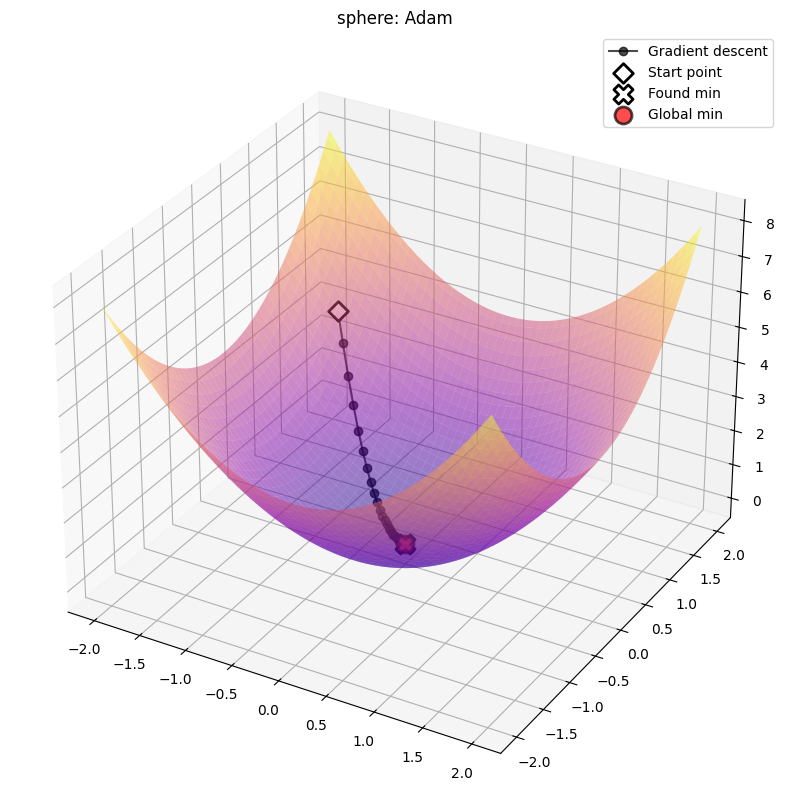

In [ ]:
adam_sphere_path = Adam(
    function=sphere_function.function,
    lr=1e-2,
    start_point=np.array([-1.5, 1.3]),
    real_min=sphere_function.real_min,
)

visualize_gradient_descent(sphere_function, adam_sphere_path, 'Adam')

Start point:	[ -9.2         8.5       265.2345085]
Found min:	[-0.62628975  8.49621235 61.64924405]
Global min:	[1 1 0]
Iterations cnt:	10001


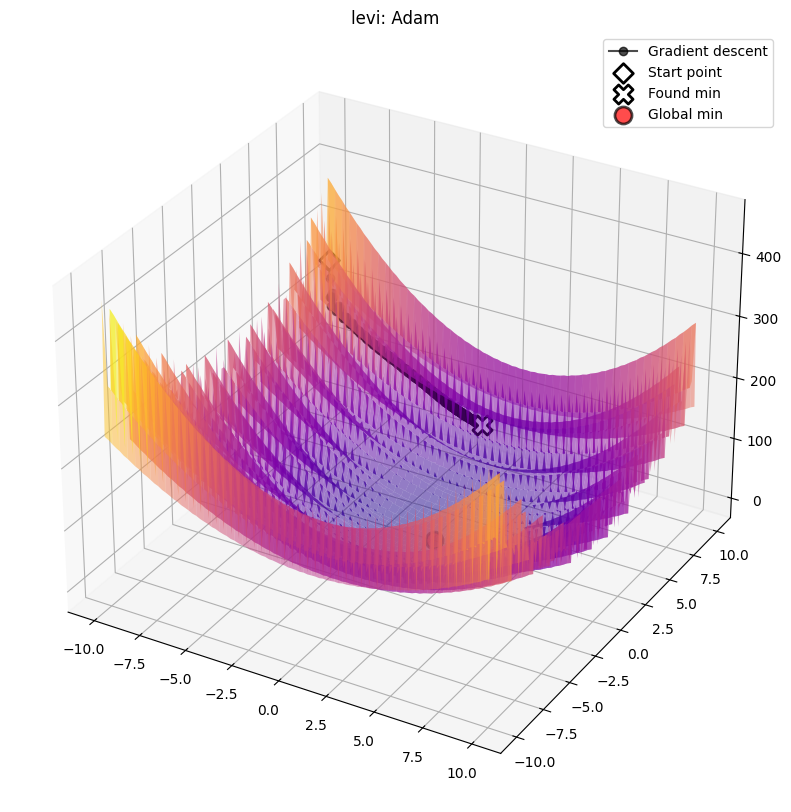

In [ ]:
adam_levi_path = Adam(
    function=levi_function.function,
    lr=1e-2,
    start_point=np.array([-9.2, 8.5]),
    real_min=levi_function.real_min,
    max_steps=1e4,
    betas=(0.9, 0.999)
)

visualize_gradient_descent(levi_function, adam_levi_path, 'Adam')

Classic GD с шедулером

In [ ]:
def GD_w_exp_scheduler(function, lr, start_point, real_min, conv_radius=1e-3, max_steps=1e3, gamma=0.7):
    path = [np.array([start_point[0], start_point[1], function(start_point)])]
    point = start_point
    step = 0
    start_lr = lr

    while np.linalg.norm(path[-1] - real_min) > conv_radius and step < max_steps:
        point = point - lr * grad(function, point)
        lr = start_lr * (1 - gamma / 100) ** step
        path.append(np.array([point[0], point[1], function(point)]))
        step += 1

    return np.array(path)

Start point:	[-1.5   1.3   3.94]
Found min:	[-7.59254708e-04  6.48692107e-04  9.97269162e-07]
Global min:	[0 0 0]
Iterations cnt:	700


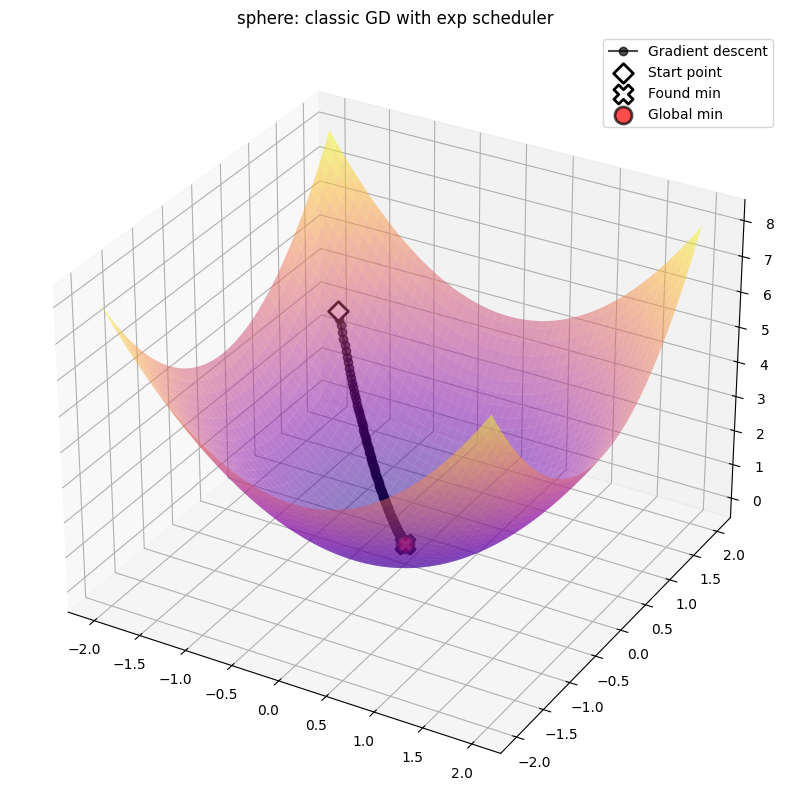

In [ ]:
classic_shed_sphere_path = GD_w_exp_scheduler(
    function=sphere_function.function,
    lr=1e-2,
    start_point=np.array([-1.5, 1.3]),
    real_min=sphere_function.real_min,
    gamma=0.2,
)

visualize_gradient_descent(sphere_function, classic_shed_sphere_path, 'classic GD with exp scheduler')

Start point:	[ -9.2         8.5       265.2345085]
Found min:	[-1.63370489 -1.35514772 16.32373585]
Global min:	[1 1 0]
Iterations cnt:	1001


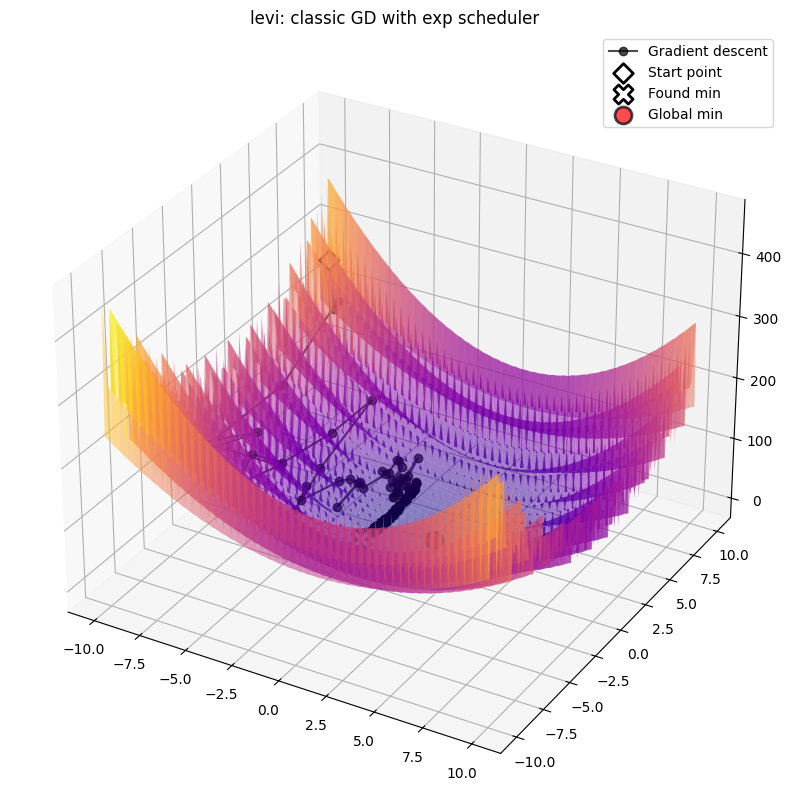

In [ ]:
classic_shed_levi_path = GD_w_exp_scheduler(
    function=levi_function.function,
    lr=1e-2,
    start_point=np.array([-9.2, 8.5]),
    real_min=levi_function.real_min,
    gamma=0.2,
)

visualize_gradient_descent(levi_function, classic_shed_levi_path, 'classic GD with exp scheduler')